In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = "../../data/raw/Property Prices in Tunisia_Cleaned.csv"  # Adjust the path if necessary
df = pd.read_csv(data_path)

# Preview the dataset
print(df.head())
print(df.info())  # Get column details

       category  room_count  bathroom_count   size      type     price  region
0  Appartements         2.0             2.0  113.0  À Vendre  170000.0      28
1  Appartements         3.0             2.0  138.0  À Vendre  340000.0      52
2  Appartements         2.0             1.0   80.0  À Vendre  230000.0      31
3  Appartements         4.0             2.0  200.0  À Vendre  440000.0      31
4  Appartements         2.0             1.0   89.0  À Vendre  136000.0      83
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 873 entries, 0 to 872
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   category        873 non-null    object 
 1   room_count      873 non-null    float64
 2   bathroom_count  873 non-null    float64
 3   size            873 non-null    float64
 4   type            873 non-null    object 
 5   price           873 non-null    float64
 6   region          873 non-null    int64  
dtypes: float64(4

In [3]:
# Select only numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
print("Numerical Features:", numerical_features)


Numerical Features: Index(['room_count', 'bathroom_count', 'size', 'price', 'region'], dtype='object')


In [4]:
# Example: Pairwise correlation between 'price' and 'size'
correlation_price_size = df['price'].corr(df['size'])
print(f"Correlation between price and size: {correlation_price_size:.2f}")

# Compute other pairwise correlations
correlation_price_room = df['price'].corr(df['room_count'])
print(f"Correlation between price and room_count: {correlation_price_room:.2f}")


Correlation between price and size: 0.59
Correlation between price and room_count: 0.23


In [5]:
# Compute correlation matrix
correlation_matrix = df[numerical_features].corr()

# Display the correlation matrix
print(correlation_matrix)


                room_count  bathroom_count      size     price    region
room_count        1.000000        0.382358  0.484361  0.232370  0.021357
bathroom_count    0.382358        1.000000  0.583308  0.435998 -0.293653
size              0.484361        0.583308  1.000000  0.593088 -0.292468
price             0.232370        0.435998  0.593088  1.000000 -0.412062
region            0.021357       -0.293653 -0.292468 -0.412062  1.000000


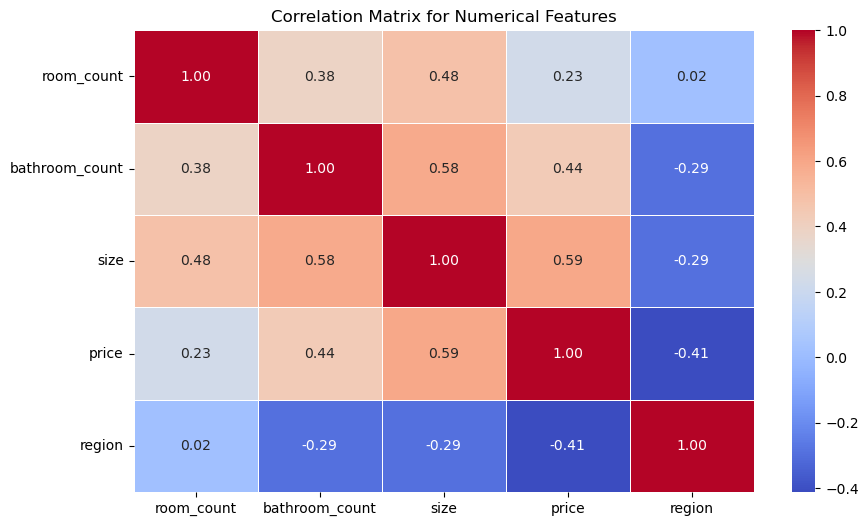

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of pairwise correlations
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix for Numerical Features")
plt.show()


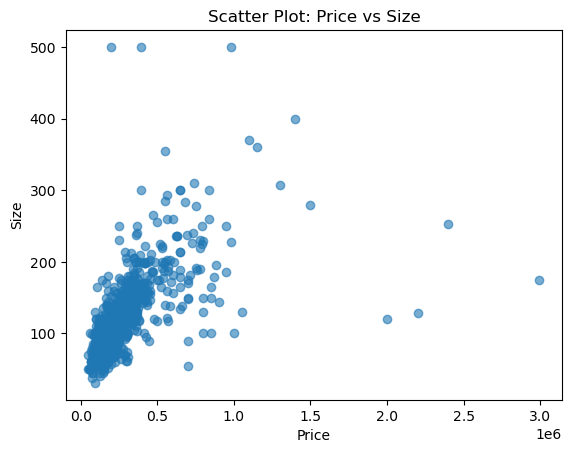

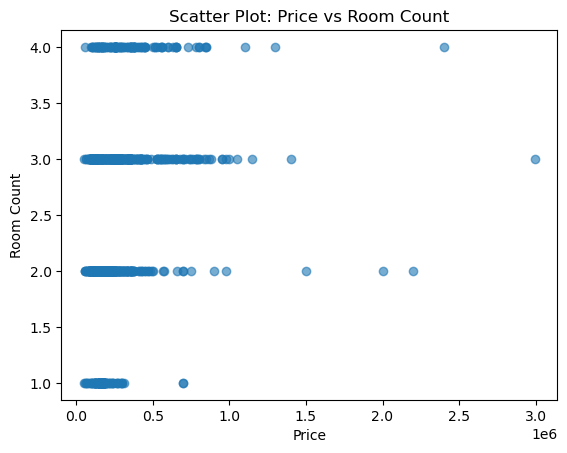

In [7]:
# Scatter plot: price vs size
plt.scatter(df['price'], df['size'], alpha=0.6)
plt.title("Scatter Plot: Price vs Size")
plt.xlabel("Price")
plt.ylabel("Size")
plt.show()

# Scatter plot: price vs room_count
plt.scatter(df['price'], df['room_count'], alpha=0.6)
plt.title("Scatter Plot: Price vs Room Count")
plt.xlabel("Price")
plt.ylabel("Room Count")
plt.show()


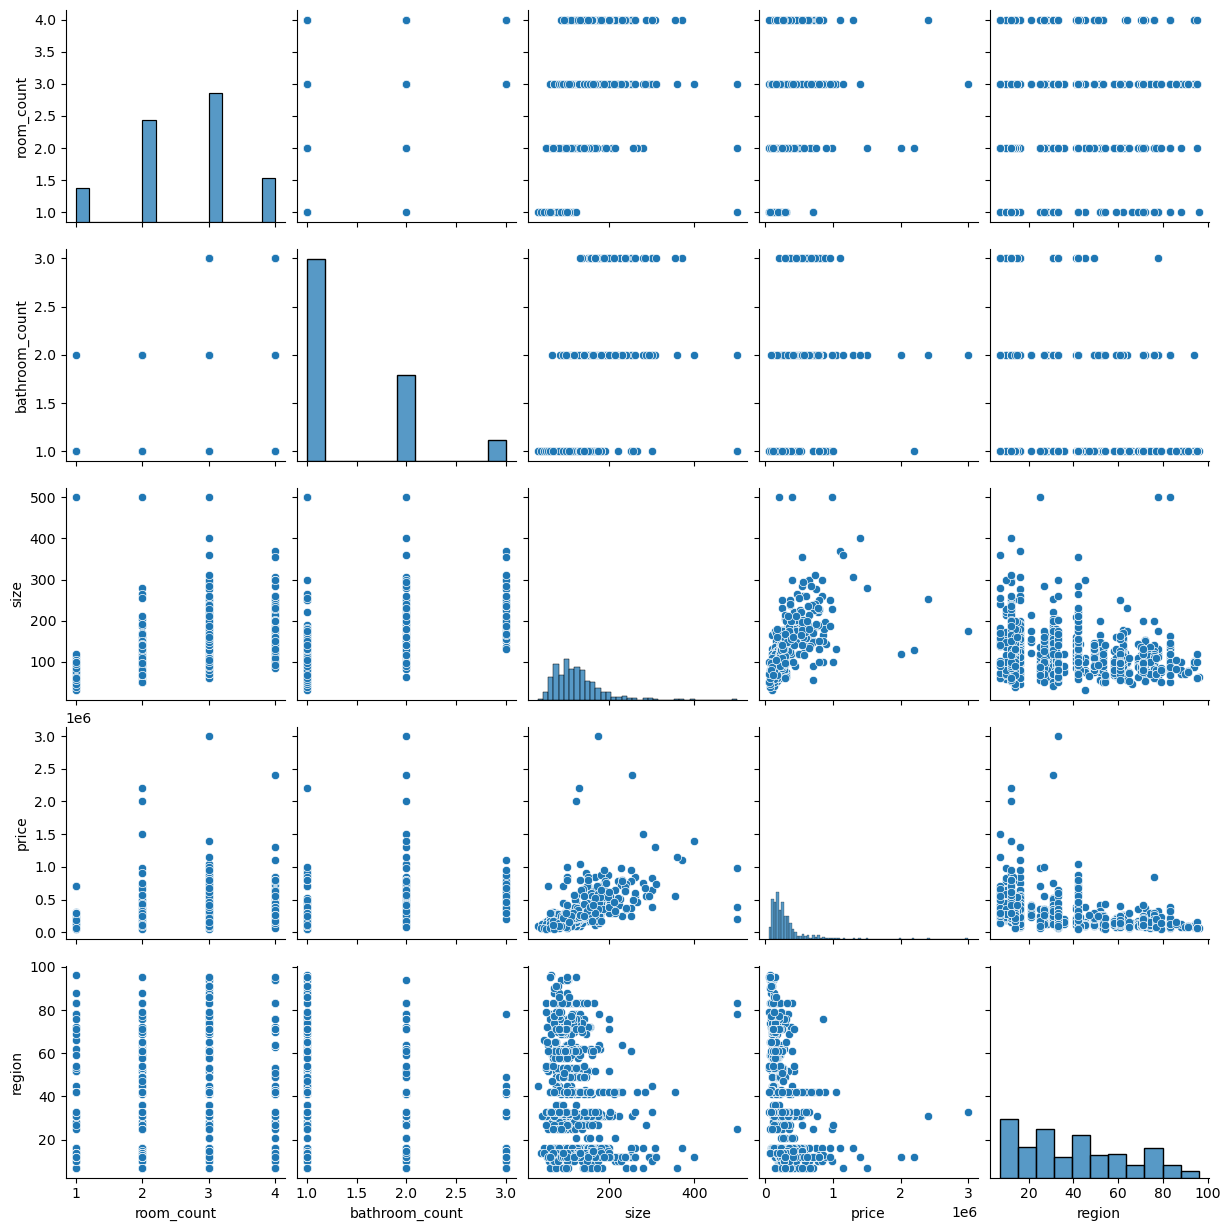

In [8]:
# Pairplot for numerical features
sns.pairplot(df[numerical_features])
plt.show()


In [9]:
# Filter high correlations
high_corr_pairs = correlation_matrix.unstack().sort_values(ascending=False)
high_corr_pairs = high_corr_pairs[high_corr_pairs < 1]  # Remove self-correlations
print("Highly Correlated Pairs:\n", high_corr_pairs[high_corr_pairs > 0.8])


Highly Correlated Pairs:
 Series([], dtype: float64)


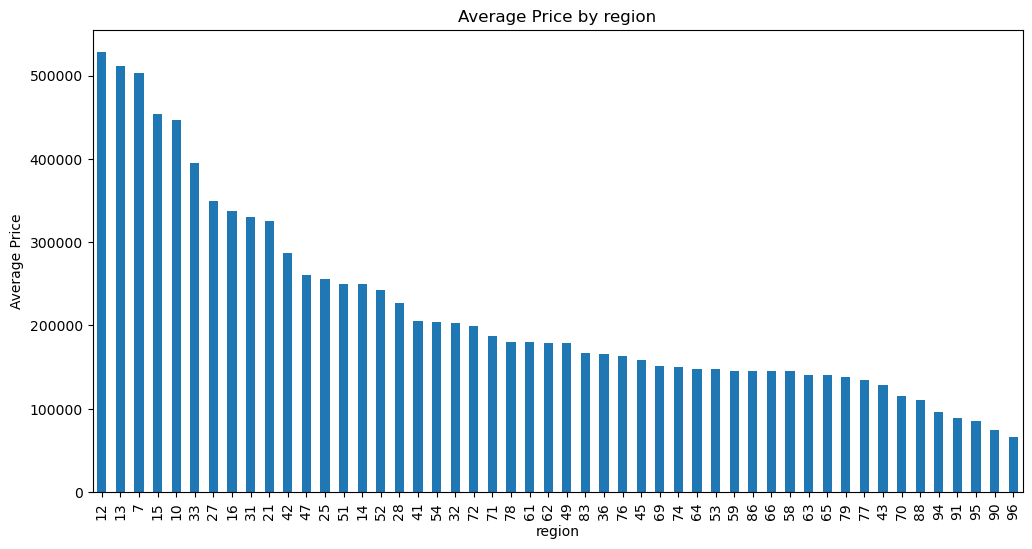

In [3]:
avg_prices = df.groupby('region')['price'].mean().sort_values(ascending=False)
avg_prices.plot(kind='bar', figsize=(12, 6), title='Average Price by region')
plt.ylabel('Average Price')
plt.show()